# Used Cars Price Prediction with Neural Networks 

## Project Description
This project is a predictive model for estimating used car prices using a deep learning approach built with TensorFlow and Keras. It involves data preprocessing, neural network model training, and hyperparameter tuning. The model is designed to handle various data processing techniques including label encoding, one-hot encoding, and feature scaling.

#### Data Preparation and Preprocessing:
* Loading the Data: The dataset (used_cars_clean.csv) is loaded using pandas.
* Data Exploration: Basic data exploration using info(), nunique(), and display methods.

#### Feature Engineering:
* One-Hot Encoding for columns with nominal values.
* Scaling of numeric columns using MinMaxScaler.

#### Model Training (Neural Network without Hyperparameter Tuning)
* Model Architecture: A Sequential Keras model with three hidden layers, each containing 512 units and ReLU activation.
* Model Compilation: Uses the Adam optimizer with Mean Squared Error (mse) as the loss function and RMSE as an additional metric.
* Early Stopping: Stops training if validation loss does not improve for 10 epochs, restoring the best weights.

#### Evaluation
* Metrics Calculation: Calculates R² scores for training, validation, and test sets.
* Loss and R² Score Visualization: Plots training and validation loss and R² score curves for better insight into model performance.

##### Hyperparameter Tuning
* Keras Tuner:
    * Defines a custom hypermodel class (MyHyperModel) for tuning.
    * Utilizes RandomSearch for finding the best configuration.
* SciKeras:
    * Builds a customizable Keras model function (build_keras_model) for hyperparameter tuning using the scikeras library.

In [28]:
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import RandomizedSearchCV, validation_curve, learning_curve, train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras_tuner import HyperModel, RandomSearch
from tensorflow.keras import layers, models
from tensorflow.keras.initializers import GlorotUniform, HeUniform
from tensorflow.keras.regularizers import l2
from scikeras.wrappers import KerasRegressor

import seaborn as sns; sns.set()
# Suppress the SettingWithCopyWarning
pd.set_option('mode.chained_assignment', None)
plt.rcParams['figure.figsize'] = (6, 4)

In [29]:
# Load the data
df = pd.read_csv('used_cars_clean.csv')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         201 non-null    int64  
 1   symboling          201 non-null    int64  
 2   normalized-losses  201 non-null    float64
 3   make               201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [31]:
df

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,peak-rpm,city-mpg,highway-mpg,price,nomalized-losses,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,8.703704,13495.0,122,Low,False,True,True,False
1,1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,8.703704,16500.0,122,Low,False,True,True,False
2,2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,5000.0,19,9.038462,16500.0,122,Medium,False,True,True,False
3,3,2,164.0,audi,four,sedan,fwd,front,99.8,0.848630,...,5500.0,24,7.833333,13950.0,164,Low,False,True,True,False
4,4,2,164.0,audi,four,sedan,4wd,front,99.4,0.848630,...,5500.0,18,10.681818,17450.0,164,Low,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,...,5400.0,23,8.392857,16845.0,95,Low,False,True,True,False
197,197,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,...,5300.0,19,9.400000,19045.0,95,Medium,False,True,False,True
198,198,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,...,5500.0,18,10.217391,21485.0,95,Medium,False,True,True,False
199,199,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,...,4800.0,26,8.703704,22470.0,95,Low,True,False,False,True


In [32]:
df.nunique()

Unnamed: 0           201
symboling              6
normalized-losses     51
make                  22
num-of-doors           2
body-style             5
drive-wheels           3
engine-location        2
wheel-base            52
length                73
width                 43
height                49
curb-weight          169
engine-type            6
num-of-cylinders       7
engine-size           43
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            59
peak-rpm              23
city-mpg              29
highway-mpg           30
price                186
nomalized-losses      51
horsepower-binned      3
fuel-type-diesel       2
fuel-type-gas          2
aspiration-std         2
aspiration-turbo       2
dtype: int64

## Preprocessing

In [33]:
df = df.drop(columns=['Unnamed: 0'])

In [34]:
# Columns to encode with Label Encoding
label_encode_columns = [
    'make', 
    'body-style', 
    'drive-wheels', 
    'engine-type', 
    'num-of-cylinders', 
    'fuel-system'
]

one_hot_encoding_columns = [
    'num-of-doors',
    'engine-location',
    'horsepower-binned',
]
# one_hot_encoding_columns = [
#     'make', 'body-style', 'drive-wheels', 'engine-type', 
#     'num-of-cylinders', 'fuel-system', 'num-of-doors', 
#     'engine-location', 'horsepower-binned'
# ]

# Columns to scale
scale_columns = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']

# 1. Label Encoding for specified columns
le = LabelEncoder()
for col in label_encode_columns:
    if col != 'price':  
        df[col] = le.fit_transform(df[col])

# 2. One-Hot Encoding for specified columns
# drop_first=False to keep the original columns
df = pd.get_dummies(df, columns=one_hot_encoding_columns, drop_first=False)

# 3. Scaling the numeric columns
scaler = MinMaxScaler()
df[scale_columns] = scaler.fit_transform(df[scale_columns])

In [35]:
df

,symboling,normalized-losses,make,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,...,fuel-type-gas,aspiration-std,aspiration-turbo,num-of-doors_four,num-of-doors_two,engine-location_front,engine-location_rear,horsepower-binned_High,horsepower-binned_Low,horsepower-binned_Medium
0,3,0.298429,0,0,2,0.058309,0.413433,0.324786,0.083333,0.411171,...,True,True,False,False,True,True,False,False,True,False
1,3,0.298429,0,0,2,0.058309,0.413433,0.324786,0.083333,0.411171,...,True,True,False,False,True,True,False,False,True,False
2,1,0.298429,0,2,2,0.230321,0.449254,0.444444,0.383333,0.517843,...,True,True,False,False,True,True,False,False,False,True
3,2,0.518325,1,3,1,0.384840,0.529851,0.504274,0.541667,0.329325,...,True,True,False,True,False,True,False,False,True,False
4,2,0.518325,1,3,0,0.373178,0.529851,0.521368,0.541667,0.518231,...,True,True,False,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,0.157068,21,3,2,0.655977,0.711940,0.735043,0.641667,0.567882,...,True,True,False,True,False,True,False,False,True,False
197,-1,0.157068,21,3,2,0.655977,0.711940,0.726496,0.641667,0.605508,...,True,False,True,True,False,True,False,False,False,True
198,-1,0.157068,21,3,2,0.655977,0.711940,0.735043,0.641667,0.591156,...,True,True,False,True,False,True,False,False,False,True
199,-1,0.157068,21,3,2,0.655977,0.711940,0.735043,0.641667,0.670675,...,False,False,True,True,False,True,False,False,True,False


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   symboling                 201 non-null    int64  
 1   normalized-losses         201 non-null    float64
 2   make                      201 non-null    int64  
 3   body-style                201 non-null    int64  
 4   drive-wheels              201 non-null    int64  
 5   wheel-base                201 non-null    float64
 6   length                    201 non-null    float64
 7   width                     201 non-null    float64
 8   height                    201 non-null    float64
 9   curb-weight               201 non-null    float64
 10  engine-type               201 non-null    int64  
 11  num-of-cylinders          201 non-null    int64  
 12  engine-size               201 non-null    float64
 13  fuel-system               201 non-null    int64  
 14  bore      

## Split the data into features and target

In [37]:
X = df.drop(columns=['price'])

In [38]:
y = df['price']

In [39]:
X.head()

,symboling,normalized-losses,make,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,...,fuel-type-gas,aspiration-std,aspiration-turbo,num-of-doors_four,num-of-doors_two,engine-location_front,engine-location_rear,horsepower-binned_High,horsepower-binned_Low,horsepower-binned_Medium
0,3,0.298429,0,0,2,0.058309,0.413433,0.324786,0.083333,0.411171,...,True,True,False,False,True,True,False,False,True,False
1,3,0.298429,0,0,2,0.058309,0.413433,0.324786,0.083333,0.411171,...,True,True,False,False,True,True,False,False,True,False
2,1,0.298429,0,2,2,0.230321,0.449254,0.444444,0.383333,0.517843,...,True,True,False,False,True,True,False,False,False,True
3,2,0.518325,1,3,1,0.384840,0.529851,0.504274,0.541667,0.329325,...,True,True,False,True,False,True,False,False,True,False
4,2,0.518325,1,3,0,0.373178,0.529851,0.521368,0.541667,0.518231,...,True,True,False,True,False,True,False,False,True,False


In [40]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=4700)

In [42]:
x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15 / 0.85, random_state=4700)

## Neural Network No Tuning

In [43]:
model = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(1, activation='linear')
])

In [44]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 512)            │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 543,233 (2.07 MB)

 Trainable params: 543,233 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

# Training the model

In [46]:
early_stopping = EarlyStopping(
    monitor='val_loss', # Monitor the validation loss
    patience=10, # Number of epochs to wait for improvement
    restore_best_weights=True
)

In [47]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 241323536.0000 - root_mean_squared_error: 15519.2305 - val_loss: 245377648.0000 - val_root_mean_squared_error: 15664.5352
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 216955712.0000 - root_mean_squared_error: 14718.6016 - val_loss: 234846832.0000 - val_root_mean_squared_error: 15324.7129
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 219130304.0000 - root_mean_squared_error: 14798.3311 - val_loss: 213996192.0000 - val_root_mean_squared_error: 14628.6084
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 191742368.0000 - root_mean_squared_error: 13839.8457 - val_loss: 179033424.0000 - val_root_mean_squared_error: 13380.3369
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 133761488.0000 - root_mean_squared_error: 11548.7900 - val_loss: 130425160.0000 - val_root_mean_squared_error: 11420.3838
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 113381120.0000 - root_mean_squared_error: 10625

### Evaluation

In [48]:
train_r2 = r2_score(y_train, model.predict(x_train))
val_r2 = r2_score(y_val, model.predict(x_val))
test_r2 = r2_score(y_test, model.predict(X_test))
print("R2 Score for training: ", train_r2)
print("R2 Score for validation: ", val_r2)
print("R2 Score for testing: ", test_r2)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2 Score for training:  0.9371024924730981
R2 Score for validation:  0.8759507681014038
R2 Score for testing:  0.9089828183141152


In [49]:
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

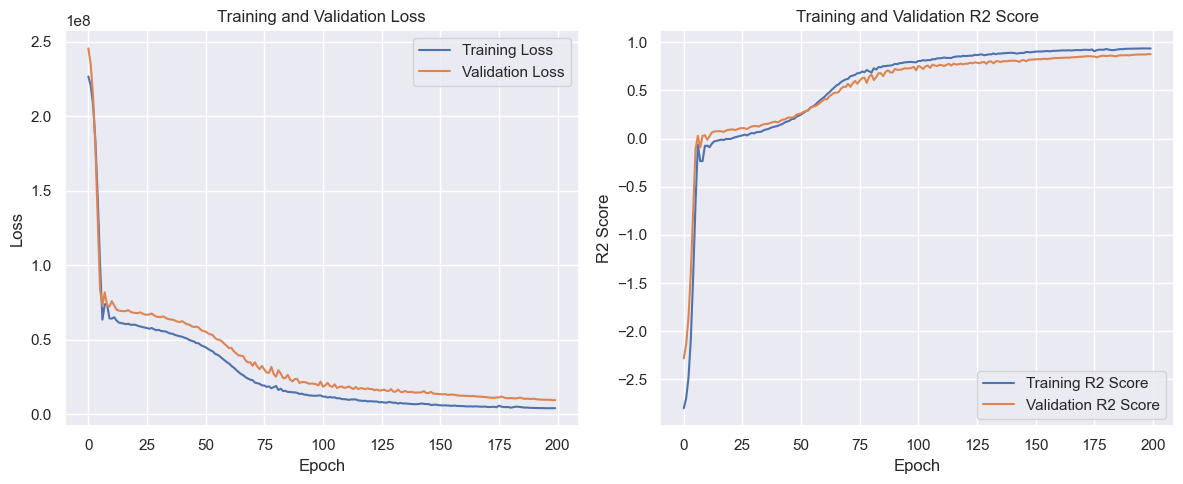

In [50]:
# Extract loss and RMSE values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

# Calculate R2 score for training and validation sets
train_r2 = [1 - (rmse ** 2 / np.var(y_train)) for rmse in train_rmse]
val_r2 = [1 - (rmse ** 2 / np.var(y_val)) for rmse in val_rmse]

# Plot training and validation loss curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation R2 score curves
plt.subplot(1, 2, 2)
plt.plot(train_r2, label='Training R2 Score')
plt.plot(val_r2, label='Validation R2 Score')
plt.xlabel('Epoch')
plt.ylabel('R2 Score')
plt.title('Training and Validation R2 Score')
plt.legend()

plt.tight_layout()
plt.show()

## Hyperparameter Tuning with Keras Tuner Fail

In [51]:
class MyHyperModel(HyperModel):
    def build(self, hp):
        new_model = Sequential()
        new_model.add(Input(shape=(x_train.shape[1],)))
        
        # Randomly choose the number of layers between 2 and 10 for each trial
        num_layers = hp.Int('num_layers', 2, 5)
        
        for i in range(num_layers):
            units = hp.Int('units_' + str(i), 32, 512, 32)
            model.add(Dense(units, activation='relu'))
        
        new_model.add(Dense(1, activation='linear'))
        new_model.compile(
            optimizer='adam',
            loss='mse',
            metrics=[tf.keras.metrics.RootMeanSquaredError()]
        )
        return new_model

In [52]:
tuner = RandomSearch(
    hypermodel=MyHyperModel(),
    objective='val_loss',
    max_trials=10,
)

In [ ]:
tuner.search(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping]
)

In [27]:
tuner.get_best_models(num_models=1)[0].summary()

ValueError: All layers added to a Sequential model should have unique names. Name 'dense' is already the name of a layer in this model. Update the `name` argument to pass a unique name.

In [131]:
best_model = tuner.get_best_models(num_models=1)[0]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 42 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [132]:
best_model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 66358308.0000 - root_mean_squared_error: 8146.0610


[66358308.0, 8146.06103515625]

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

## Hyperparameter Tuning with SciKeras

In [158]:
def build_keras_model(depth, width, reg_lambda=0):
    new_model = Sequential()
    new_model.add(Input(shape=(x_train.shape[1],)))
    for layer in range(depth):
        new_model.add(Dense(units=width, 
                        activation='relu', 
                        # kernel_regularizer=l2(reg_lambda), 
                        # kernel_initializer=HeUniform(seed=4700), #intialize the weights of the neural network
                        name='Layer_' + str(layer+1)))
    
    new_model.add(Dense(units=1,
                    activation='linear',
                    # kernel_regularizer=l2(reg_lambda), 
                    # kernel_initializer=HeUniform(seed=4700),
                    name='Output'))
    return new_model

In [159]:
test_model = build_keras_model(depth=3, width=512)
test_model.summary()

Model: "sequential_94"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Layer_1 (Dense)                 │ (None, 512)            │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer_3 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 543,233 (2.07 MB)

 Trainable params: 543,233 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

In [161]:
#print score of pred
test_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)
# Training the model
early_stopping2 = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=10,  # Number of epochs to wait for improvement
    restore_best_weights=True
)
history2 = test_model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    batch_size=32,
    callbacks=[early_stopping]
)
# Evaluation
test_train_r2 = r2_score(y_train, test_model.predict(x_train))
test_val_r2 = r2_score(y_val, test_model.predict(x_val))
test_test_r2 = r2_score(y_test, test_model.predict(X_test))
print("R2 Score for training: ", train_r2)
print("R2 Score for validation: ", val_r2)
print("R2 Score for testing: ", test_r2)


Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5101514.0000 - root_mean_squared_error: 2256.0549 - val_loss: 10413855.0000 - val_root_mean_squared_error: 3227.0505
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5025755.0000 - root_mean_squared_error: 2233.3530 - val_loss: 10291726.0000 - val_root_mean_squared_error: 3208.0720
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3233179.5000 - root_mean_squared_error: 1790.6521 - val_loss: 9371295.0000 - val_root_mean_squared_error: 3061.2571
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4040632.5000 - root_mean_squared_error: 2008.4150 - val_loss: 8889532.0000 - val_root_mean_squared_error: 2981.5317
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3171826.5000 - root_mean_squared_error: 1778.1968 - val_loss: 9431421.0000 - val_root_mean_squared_error: 3071.0618
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3870177.5000 - root_mean_squared_error: 1966.2183 - val_loss: 9267692.0000 

In [150]:
regressor = KerasRegressor(
    model=build_keras_model,
    epochs=30,
    batch_size=32,
    verbose=1,
    loss='mse',
)

In [151]:
param_distributions = {
    "model__depth": [2, 3, 4],  # Number of layers
    "model__width": [128, 256, 512],  # Number of units per layer
    "model__reg_lambda": [0.0, 0.01, 0.001],  # Regularization parameter
    "optimizer__learning_rate": [1e-2, 1e-3, 1e-4],  # Learning rate
}

In [152]:
random_search = RandomizedSearchCV(
    estimator=regressor,
    param_distributions=param_distributions,
    n_iter=10,
    scoring=make_scorer(r2_score),
    cv=3,
    verbose=1,
    n_jobs=1,
)

In [153]:
random_search.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 213007040.0000
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 190882512.0000 
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 203580256.0000 
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 186636672.0000 
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 195271824.0000 
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 189527280.0000 
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 176968192.0000 
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 184870800.0000 
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 161992224.0000 
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 153711120.0000 
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 148707584.0000 
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 142998672.0000 
Epoch 13/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 108497120.0000 


RandomizedSearchCV(cv=3,
                   estimator=KerasRegressor(batch_size=32, epochs=30, loss='mse', model=<function build_keras_model at 0x176b9dc60>),
                   n_jobs=1,
                   param_distributions={'model__depth': [2, 3, 4],
                                        'model__reg_lambda': [0.0, 0.01, 0.001],
                                        'model__width': [128, 256, 512],
                                        'optimizer__learning_rate': [0.01,
                                                                     0.001,
                                                                     0.0001]},
                   scoring=make_scorer(r2_score, response_method='predict'),
                   verbose=1)

In [154]:
print("Best Parameters:", random_search.best_params_)
print("Best R² Score:", random_search.best_score_)

Best Parameters: {'optimizer__learning_rate': 0.01, 'model__width': 512, 'model__reg_lambda': 0.01, 'model__depth': 4}
Best R² Score: 0.5168526259206242
